In [1]:
import daspi as dsp
DPI = 120
dsp.STR._username_ = 'j4ggr'
dsp.__version__

'1.5.0'

formula:
result_rnr ~ 0.1003 + 0.0022*part[T.2] - 0.0025*part[T.3] + 0.0045*part[T.4] + 0.0077*part[T.5] - 0.0027*part[T.6] + 0.0015*part[T.7] + 0.0075*part[T.8] - 0.0085*part[T.9] - 0.0062*part[T.10] + 0.0003*operator[T.B] + 0.0000*operator[T.C]

Model summary:
   hierarchical least_parameter  p_least         s         aic        r2  \
0          True        operator  0.54296  0.000821 -671.752762  0.980053   

     r2_adj   r2_pred  
0  0.975482  0.968833  

Analysis of variance:
Typ-II    DF            SS            MS           F             p        n2
Source                                                                      
part       9  1.587817e-03  1.764241e-04  261.907904  1.183467e-37  0.979539
operator   2  8.333333e-07  4.166667e-07    0.618557  5.429598e-01  0.000514
Residual  48  3.233333e-05  6.736111e-07         NaN           NaN  0.019947

Repeatability and reproducibility (R&R):
                 MS  MS/Total         s        6s  6s/Total  6s/Tolerance
R&R    6.736111e-07   0.02248  0.000821  0.004924  0.149932      0.164148
EV     6.736111e-07   0.02248  0.000821  0.004924  0.149932      0.164148
AV     0.000000e+00   0.00000  0.000000  0.000000  0.000000      0.000000
Part   2.929174e-05   0.97752  0.005412  0.032473  0.988696      1.082437
Total  2.996535e-05   1.00000  0.005474  0.032844  1.000000      1.094812

Measurement uncertainty:
            u         U         Q
RE   0.000289  0.000577  0.038490
Bi   0.000134  0.000268  0.017838
EVR  0.000688  0.001377  0.091785
MS   0.000701  0.001403  0.093502
EVO  0.000821  0.001641  0.109432
AV   0.000000  0.000000  0.000000
IA   0.000000  0.000000  0.000000
MP   0.000832  0.001663  0.110876

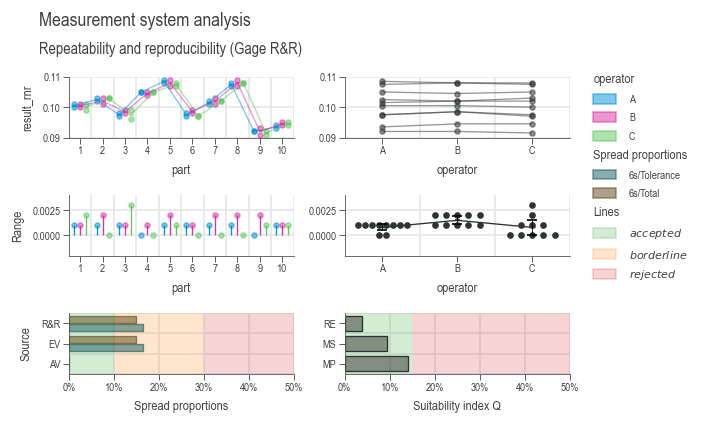

In [2]:
import daspi as dsp
df = dsp.load_dataset('grnr_layer_thickness')
gage = dsp.GageEstimator(
    samples=df['result_gage'],
    reference=df['reference'][0],
    U_cal=df['U_cal'][0],
    tolerance=df['tolerance'][0],
    resolution=df['resolution'][0])
rnr_model = dsp.GageRnRModel(
    source=df,
    target='result_rnr',
    part='part',
    reproducer='operator',
    gage=gage)
chart = dsp.GageRnRCharts(rnr_model).plot().stripes().label()
rnr_model

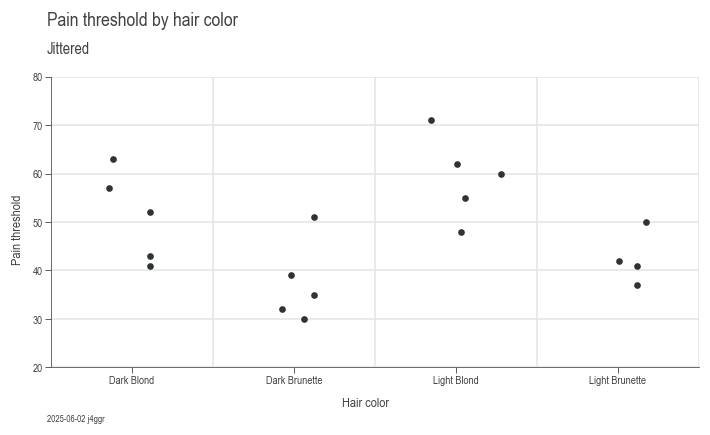

In [4]:
import daspi as dsp

df = dsp.load_dataset('anova')
chart = dsp.SingleChart(
        source=df,
        target='Pain threshold',
        feature='Hair color',
        categorical_feature=True,
    ).plot(
        dsp.Jitter
    ).label(
        fig_title='Pain threshold by hair color',
        sub_title='Jittered',
        feature_label=True,
        target_label=True,
        info=True
    )

chart.save('./docs/img/anova_jitter_pain-color.png', dpi=DPI)

In [ ]:
model = dsp.LinearModel(df, 'Pain threshold', ['Hair color'])
model

formula:
Pain threshold ~ 51.2000 - 13.8000*Hair color[T.Dark Brunette] + 8.0000*Hair color[T.Light Blond] - 8.7000*Hair color[T.Light Brunette]

Model summary:
   hierarchical least_parameter   p_least         s         aic        r2  \
0          True      Hair color  0.004114  8.172311  137.256843  0.575962   

     r2_adj   r2_pred  
0  0.491155  0.329331  

Parameter statistics:
                              coef   std err          t             p  \
Intercept                     51.2  3.654769  14.009095  5.074075e-10   
Hair color[T.Dark Brunette]  -13.8  5.168623  -2.669957  1.747971e-02   
Hair color[T.Light Blond]      8.0  5.168623   1.547801  1.425066e-01   
Hair color[T.Light Brunette]  -8.7  5.482153  -1.586968  1.333718e-01   

                                 ci_low     ci_upp  
Intercept                     43.410045  58.989955  
Hair color[T.Dark Brunette]  -24.816660  -2.783340  
Hair color[T.Light Blond]     -3.016660  19.016660  
Hair color[T.Light Brunette] -20.384932   2.984932  

Analysis of variance:
Typ-I       DF           SS          MS         F         p        n2
Source                                                               
Hair color   3  1360.726316  453.575439  6.791407  0.004114  0.575962
Residual    15  1001.800000   66.786667       NaN       NaN  0.424038

Variance inflation factor:
            DF  VIF GVIF  Threshold  Collinear               Method
Intercept    1  4.0  2.0   2.236068      False            R_squared
Hair color   3  1.0  1.0   1.307660      False  single_order-1_term

In [6]:
x_bar_group = df.groupby('Hair color')['Pain threshold'].mean()
x_bar = df['Pain threshold'].mean()
(x_bar_group - x_bar).abs()

Hair color
Dark Blond         3.357895
Dark Brunette     10.442105
Light Blond       11.357895
Light Brunette     5.342105
Name: Pain threshold, dtype: float64

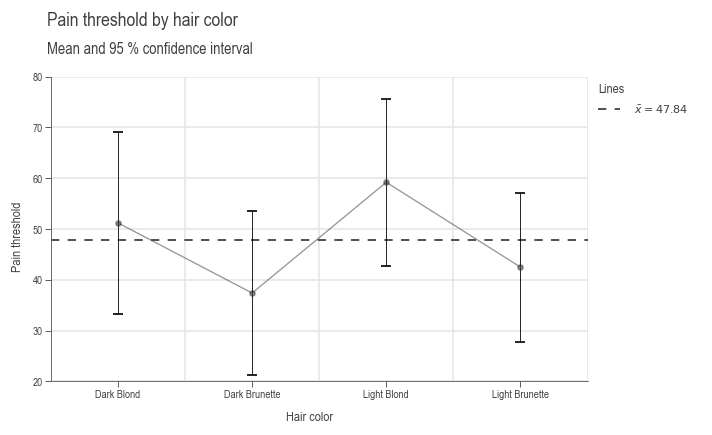

In [7]:
LEVEL = 0.95
n_groups = df.groupby(['Hair color']).ngroups
chart = dsp.SingleChart(
        source=df,
        target='Pain threshold',
        feature='Hair color',
        categorical_feature=True,
    ).plot(
        dsp.MeanTest,
        n_groups=n_groups,
        confidence_level=LEVEL,
        show_center=False
    ).plot(
        dsp.CenterLocation
    ).stripes(
        mean=True
    ).label(
        fig_title='Pain threshold by hair color',
        sub_title=f'Mean and {int(100*LEVEL)} % confidence interval',
        feature_label=True,
        target_label=True,
    )

chart.save('./docs/img/anova_mean-ci_pain-color.png', dpi=DPI)

In [8]:
model.uncertainty

8.172310974667244

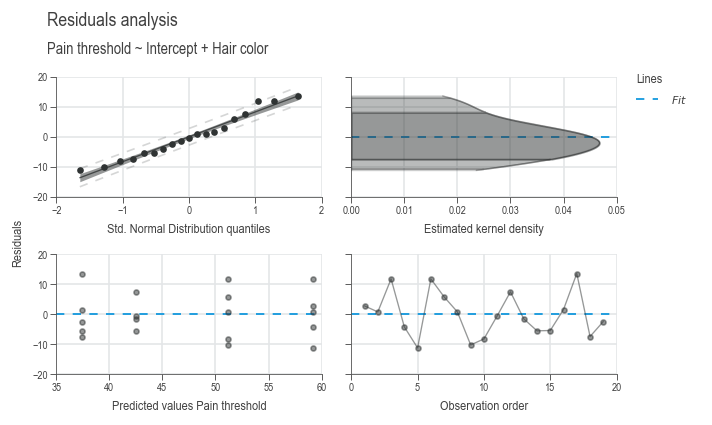

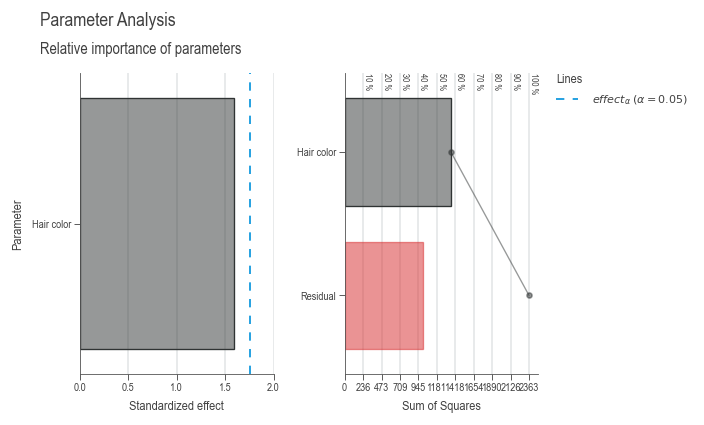

In [9]:
chart_r = dsp.ResidualsCharts(model).plot().stripes().label()
chart_p = dsp.ParameterRelevanceCharts(model).plot().stripes().label()

chart_r.save('./docs/img/anova_residues_pain-color.png', dpi=DPI)
chart_p.save('./docs/img/anova_parameter-relevance_pain-color.png', dpi=DPI)
